<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Flats for Rent in Mumbai</h1>

Dataset is downloaded from here: https://www.kaggle.com/jedipro/flats-for-rent-in-mumbai/download

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

<h2 style='color:blue'>Data Load: Load Flats for Rent in Mumbai into a dataframe</h2>

In [2]:
df = pd.read_csv('prop_data_clean.csv')
df.head()

,area,bathroom_num,bedroom_num,city,desc,dev_name,floor_count,floor_num,furnishing,id,...,longitude,post_date,poster_name,price,project,title,trans,type,url,user_type
0,350.0,2.0,1,Mumbai,"2 Bath,Unfurnished,East facing The project has...",NaN,NaN,NaN,Unfurnished,45349857,...,72.825882,2020-01-11,Saurabh Patil,9000,NaN,1 BHK Apartment for Rent in Malad West,Rent,Apartment,/propertyDetails/1-BHK-350-Sq-ft-Multistorey-A...,Agent
1,652.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing A 1BHK apart...",Veena Group,NaN,NaN,Semi-Furnished,45960973,...,72.833592,2020-01-11,Gorakh Chavan,8060,Veena Dynasty,"1 BHK Apartment for Rent in Veena Dynasty, Vasai",Rent,Apartment,/propertyDetails/1-BHK-652-Sq-ft-Multistorey-A...,Agent
2,635.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,4 floor,West facing A be...",Agarwal Group,7.0,4.0,Semi-Furnished,46688849,...,72.801612,2019-12-13,Lokesh Joshi,8000,Agarwal Lifestyle,"1 BHK Apartment for Rent in Agarwal Lifestyle,...",Rent,Apartment,/propertyDetails/1-BHK-635-Sq-ft-Multistorey-A...,Agent
3,540.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing Essential Se...",NaN,NaN,NaN,Semi-Furnished,44696119,...,72.836006,2020-01-13,Sajith Thomas,8000,NaN,1 BHK Apartment for Rent in Vasai East,Rent,Apartment,/propertyDetails/1-BHK-540-Sq-ft-Multistorey-A...,Agent
4,625.0,1.0,1,Mumbai,"1 Bath,Furnished,2 floor,North facing 24 hours...",Millennium Group,7.0,2.0,Furnished,46742851,...,72.850167,2019-12-17,Charmaine Gomez,9000,Mittal Enclave,"1 BHK Apartment for Rent in Mittal Enclave, Na...",Rent,Apartment,/propertyDetails/1-BHK-625-Sq-ft-Multistorey-A...,Owner


In [3]:
df['city'].unique()

array(['Mumbai'], dtype=object)

In [4]:
df.columns

Index(['area', 'bathroom_num', 'bedroom_num', 'city', 'desc', 'dev_name',
       'floor_count', 'floor_num', 'furnishing', 'id', 'id_string', 'latitude',
       'locality', 'longitude', 'post_date', 'poster_name', 'price', 'project',
       'title', 'trans', 'type', 'url', 'user_type'],
      dtype='object')

In [5]:
df.count().sum()

752126

In [6]:
df['floor_count'].isnull().sum()

2860

**Drop features that are not required to build our model**

In [7]:
df1 = df.drop(['city','desc','dev_name','floor_count', 'floor_num', 'id', 'id_string','post_date', 'poster_name','project',
       'title', 'trans', 'type', 'url', 'latitude','longitude'],axis='columns')
df1.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner


Area is in Sq feet 

<h2 style='color:blue'>Data Cleaning:</h2>

In [8]:
df1['user_type'].unique()

array(['Agent', 'Owner', 'Builder'], dtype=object)

In [9]:
df1.shape

(34348, 7)

In [10]:
df1.isnull().sum()

area            776
bathroom_num     14
bedroom_num       0
furnishing       10
locality        208
price             0
user_type         0
dtype: int64

In [11]:
df2 = df1.dropna()
df2.isnull().sum()

area            0
bathroom_num    0
bedroom_num     0
furnishing      0
locality        0
price           0
user_type       0
dtype: int64

In [12]:
df2.shape

(33346, 7)

In [13]:
df2.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner


In [14]:
location = df2['locality'].value_counts()
location

Powai            1453
Chembur          1400
Andheri West     1359
Andheri East     1092
Worli            1006
                 ... 
Joshi Wadi          1
Marve               1
Nimoni Baug         1
Aksa Gaon           1
Shivaji Nagar       1
Name: locality, Length: 821, dtype: int64

In [15]:
location.values.sum()

33346

In [16]:
len(location[location>10])

274

In [17]:
len(location)

821

In [18]:
len(location[location<=10])

547

In [19]:
location_stats_less_than_10 = location[location<=10]
location_stats_less_than_10

Juhu Beach Area            10
Vidya Nagari               10
Pleasant Park              10
Nana Chowk                 10
Azad Nagar Versova Road    10
                           ..
Joshi Wadi                  1
Marve                       1
Nimoni Baug                 1
Aksa Gaon                   1
Shivaji Nagar               1
Name: locality, Length: 547, dtype: int64

In [20]:
len(df2.locality.unique())

821

In [21]:
df2['locality'] = df2.locality.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.locality.unique())

C:\Users\sufyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


275

In [22]:
df2.head(10)

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner
5,630.0,2.0,1,Unfurnished,Virar West,8000,Agent
6,690.0,2.0,1,Furnished,Virar,8500,Agent
7,338.0,1.0,1,Unfurnished,Royal Palms Estate,10000,Agent
8,675.0,2.0,1,Furnished,Virar,9000,Agent
9,500.0,1.0,1,Semi-Furnished,Virar West,8000,Agent


In [23]:
df3 = df2.copy()

In [24]:
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner


In [25]:
df3['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [26]:
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner


In [27]:
df3['price_per_sqft'] = df3['price']/df3['area']
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent,25.714286
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner,14.400000


In [28]:
df3_stats = df3['price_per_sqft'].describe()
df3_stats

count    33346.000000
mean        58.737641
std        154.744405
min          2.812500
25%         38.095238
50%         49.404753
75%         68.000000
max      20000.000000
Name: price_per_sqft, dtype: float64

In [29]:
df3.to_csv("stage1_sufyan_project_mumbai_home_price.csv",index=False)

In [30]:
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent,25.714286
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner,14.400000


In [31]:
df3['bedroom_num'].value_counts()

2    13127
1     9803
3     8351
4     1902
5      163
Name: bedroom_num, dtype: int64

In [32]:
bathroom_stat = df3['bathroom_num'].value_counts()
bathroom_stat

2.0    18320
3.0     6626
1.0     5773
4.0     1950
5.0      549
6.0      121
7.0        4
8.0        3
Name: bathroom_num, dtype: int64

In [33]:
bathroom_stat_greater_six = bathroom_stat[bathroom_stat<=4]
bathroom_stat_greater_six

7.0    4
8.0    3
Name: bathroom_num, dtype: int64

In [34]:
df3[df3.area/df3.bedroom_num<300].head(20)

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
14,240.0,2.0,1,Unfurnished,Malad West,9000,Agent,37.500000
18,225.0,1.0,1,Semi-Furnished,Andheri East,10000,Agent,44.444444
21,225.0,1.0,1,Furnished,Mulund East,10000,Owner,44.444444
33,250.0,1.0,1,Semi-Furnished,other,10000,Agent,40.000000
43,160.0,1.0,1,Unfurnished,Worli,9000,Owner,56.250000
54,225.0,1.0,1,Unfurnished,Borivali West,9500,Agent,42.222222
71,220.0,1.0,1,Semi-Furnished,Sakinaka,9000,Owner,40.909091
74,130.0,1.0,1,Unfurnished,other,10000,Owner,76.923077
76,225.0,1.0,1,Semi-Furnished,other,10000,Owner,44.444444
78,225.0,1.0,1,Unfurnished,Kandivali East,10000,Owner,44.444444


In [35]:
df3.price_per_sqft.describe()

count    33346.000000
mean        58.737641
std        154.744405
min          2.812500
25%         38.095238
50%         49.404753
75%         68.000000
max      20000.000000
Name: price_per_sqft, dtype: float64

In [36]:
df3.shape

(33346, 8)

In [37]:
df4 = df3.copy()

In [38]:
df4.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent,25.714286
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner,14.400000


In [39]:
temp = df4[df4.area/df4.bedroom_num<200]
len(temp)

36

In [40]:
df4.shape

(33346, 8)

In [41]:
df5 = df4[~(df4.area/df4.bedroom_num<200)]
df5.shape

(33310, 8)

In [42]:
df5['price_per_sqft'].describe()

count    33310.000000
mean        56.841079
std         31.957135
min          2.812500
25%         38.095238
50%         49.342105
75%         67.857143
max       1090.909091
Name: price_per_sqft, dtype: float64

In [43]:
df6 = df5.copy()
df6.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent,25.714286
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner,14.400000


In [44]:
df6.shape

(33310, 8)

In [45]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('locality'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(26979, 8)

In [46]:
df7.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,2326.0,3.0,4,Unfurnished,4 Bunglows,125000,Agent,53.740327
1,1800.0,4.0,4,Furnished,4 Bunglows,125000,Agent,69.444444
2,2500.0,4.0,4,Semi-Furnished,4 Bunglows,125000,Agent,50.000000
3,2600.0,4.0,4,Semi-Furnished,4 Bunglows,150000,Agent,57.692308
4,2572.0,3.0,4,Semi-Furnished,4 Bunglows,140000,Agent,54.432348


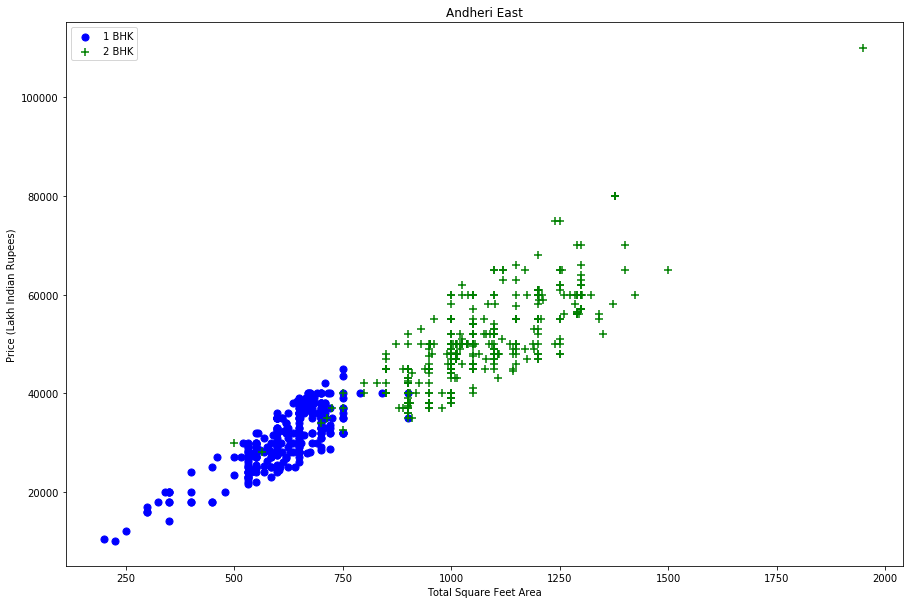

In [47]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bedroom_num==1)]
    bhk3 = df[(df.locality==locality) & (df.bedroom_num==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(df7,"Andheri East")

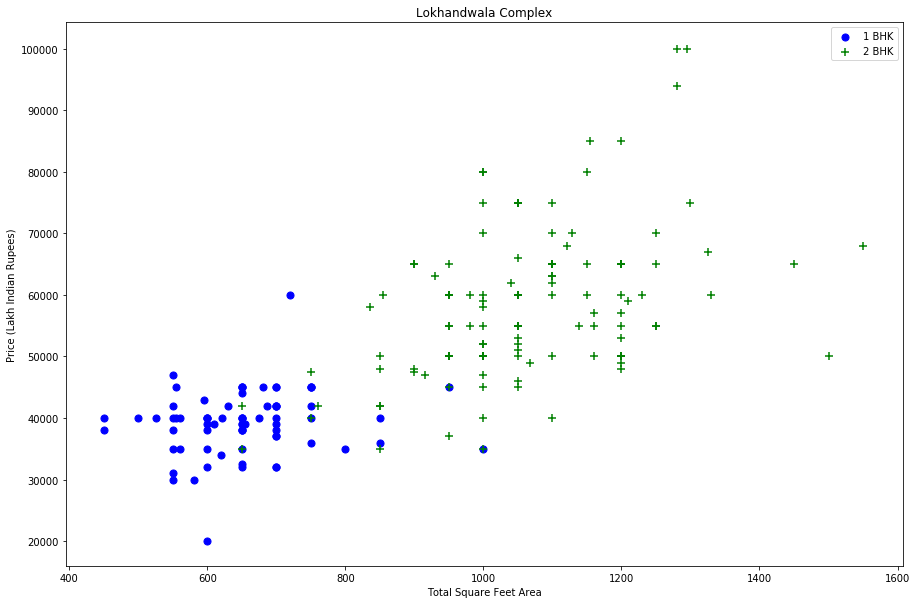

In [48]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bedroom_num==1)]
    bhk3 = df[(df.locality==locality) & (df.bedroom_num==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(df7,"Lokhandwala Complex")

In [49]:
df7.shape

(26979, 8)

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('locality'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedroom_num'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedroom_num'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(16457, 8)

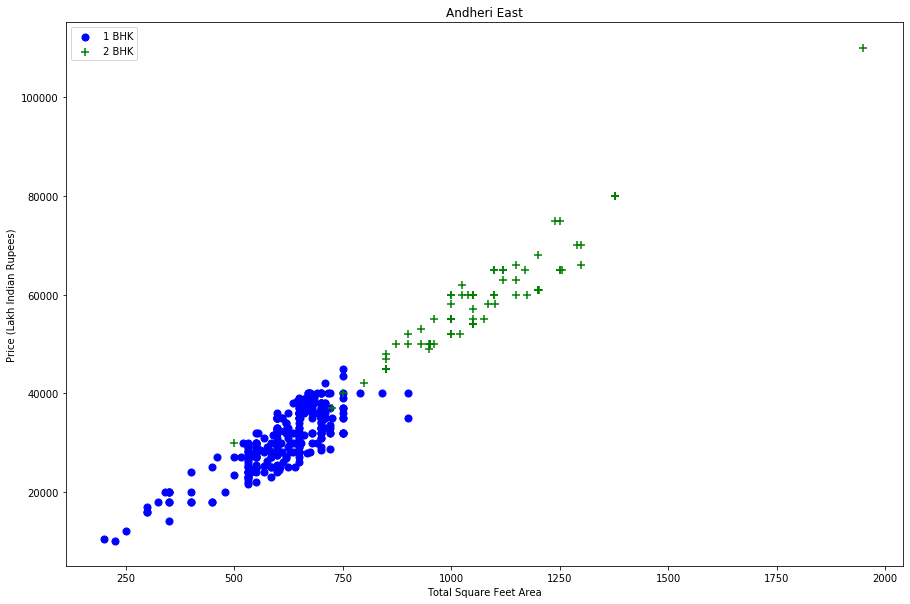

In [51]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bedroom_num==1)]
    bhk3 = df[(df.locality==locality) & (df.bedroom_num==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(df8,"Andheri East")

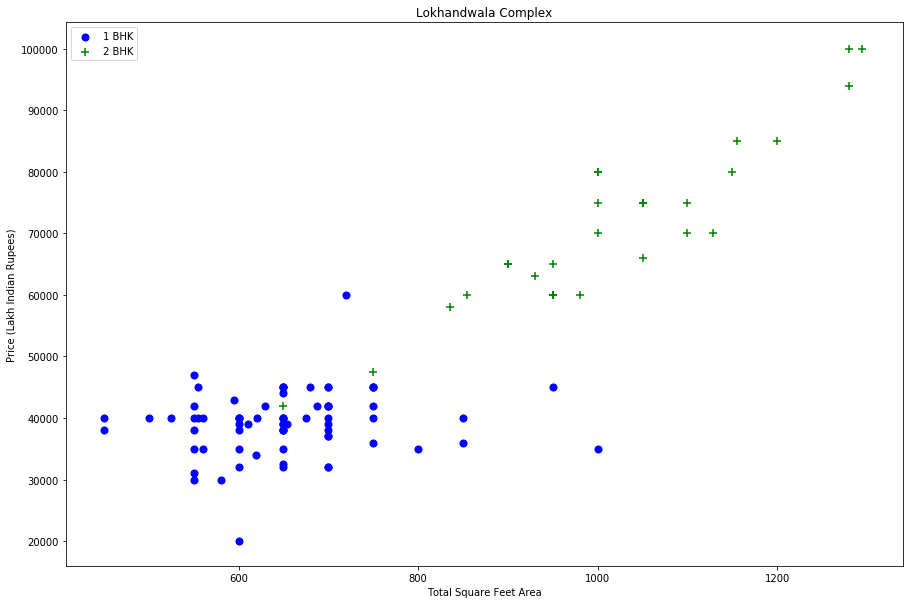

In [52]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bedroom_num==1)]
    bhk3 = df[(df.locality==locality) & (df.bedroom_num==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(df8,"Lokhandwala Complex")

In [53]:
df9 = df8.copy()
df9.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
1,1800.0,4.0,4,Furnished,4 Bunglows,125000,Agent,69.444444
3,2600.0,4.0,4,Semi-Furnished,4 Bunglows,150000,Agent,57.692308
5,2572.0,4.0,4,Unfurnished,4 Bunglows,165000,Agent,64.152411
6,2400.0,4.0,4,Unfurnished,4 Bunglows,165000,Agent,68.750000
7,450.0,1.0,1,Unfurnished,4 Bunglows,23000,Agent,51.111111


Text(0, 0.5, 'Count')

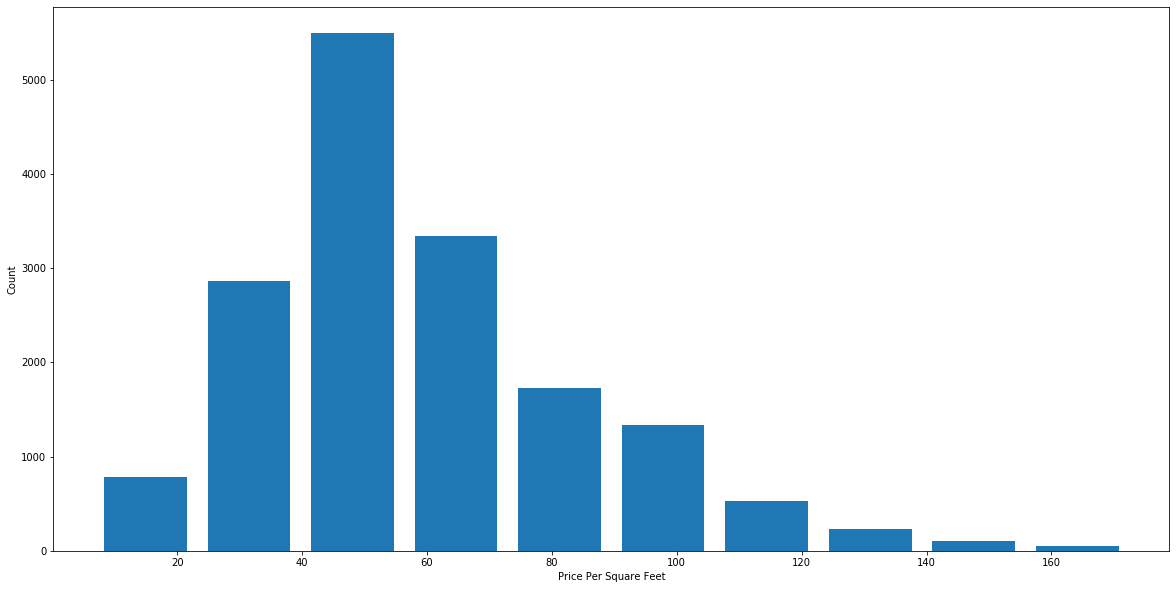

In [54]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [55]:
df9['bathroom_num'].unique()

array([4., 1., 2., 3., 6., 5., 7.])

In [56]:
df9[df9['bathroom_num']>df9['bedroom_num']+2]

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
4442,910.0,6.0,2,Furnished,Bhandup West,35000,Agent,38.461538
18202,1550.0,4.0,1,Unfurnished,Powai,100000,Agent,64.516129
23134,600.0,5.0,1,Semi-Furnished,Vikhroli East,28000,Agent,46.666667


In [57]:
df9 = df9[df9['bathroom_num']<df9['bedroom_num']+2]
df9.shape

(16376, 8)

In [58]:
df10 = df9.drop(['price_per_sqft','user_type'],axis='columns')
df10.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price
1,1800.0,4.0,4,Furnished,4 Bunglows,125000
3,2600.0,4.0,4,Semi-Furnished,4 Bunglows,150000
5,2572.0,4.0,4,Unfurnished,4 Bunglows,165000
6,2400.0,4.0,4,Unfurnished,4 Bunglows,165000
7,450.0,1.0,1,Unfurnished,4 Bunglows,23000


In [59]:
df10['furnishing'].unique()

array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)

In [60]:
df11 = df10.copy()

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
df11['furnishing']= le.fit_transform(df10['furnishing']) 
df11['furnishing'].unique()

array([0, 1, 2], dtype=int64)

In furnishing column   
 0 = 'Furnished'   
 1 = 'Semi-Furnished'   
 2 = 'Unfurnished'

In [63]:
df11.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price
1,1800.0,4.0,4,0,4 Bunglows,125000
3,2600.0,4.0,4,1,4 Bunglows,150000
5,2572.0,4.0,4,2,4 Bunglows,165000
6,2400.0,4.0,4,2,4 Bunglows,165000
7,450.0,1.0,1,2,4 Bunglows,23000


In [64]:
dummies = pd.get_dummies(df11.locality)
dummies.head(3)

,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,Alika Nagar,Altamount Road,Amboli,Andheri East,Andheri West,...,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df11 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,4 Bunglows,125000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,4 Bunglows,150000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4.0,4,2,4 Bunglows,165000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2400.0,4.0,4,2,4 Bunglows,165000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,450.0,1.0,1,2,4 Bunglows,23000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df12 = df11.drop('locality',axis='columns')
df12.head(2)

,area,bathroom_num,bedroom_num,furnishing,price,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df12.shape

(16376, 279)

In [83]:
df12.rename(columns = {'area':'total_sqft', 'bathroom_num':'bath', 
                              'bedroom_num':'bhk'}, inplace = True)
df12.head()

,total_sqft,bath,bhk,furnishing,price,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4.0,4,2,165000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2400.0,4.0,4,2,165000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,450.0,1.0,1,2,23000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,furnishing,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,Alika Nagar,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4.0,4,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
X.shape

(16376, 278)

In [86]:
y = df12.price
y.head(3)

1    125000
3    150000
5    165000
Name: price, dtype: int64

In [87]:
len(y)

16376

In [88]:
df12.head()

,total_sqft,bath,bhk,furnishing,price,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4.0,4,2,165000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2400.0,4.0,4,2,165000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,450.0,1.0,1,2,23000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df12.rename(columns = {'area':'total_sqft', 'bathroom_num':'bath', 
                              'bedroom_num':'bhk'}, inplace = True)
df12.head()

,total_sqft,bath,bhk,furnishing,price,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4.0,4,2,165000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2400.0,4.0,4,2,165000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,450.0,1.0,1,2,23000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 style='color:blue'>Build a Model Now...</h2>

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [91]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9165351367392474

K Fold cross validation

In [92]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91354337, 0.91321954, 0.91264911, 0.91376545, 0.90433215])

GridSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.911502,{'normalize': True}
1,lasso,0.911442,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.896967,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Test the model for few properties

In [94]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [95]:
predict_price('4 Bunglows',700, 2, 2)

25408.573698194807

<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [96]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

<h2 style='color:blue'>Export location and column information to a file</h2>

In [97]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))